In [1]:
import os, sys, email, datetime, pprint, re, time, html, pickle
import numpy as np
import pandas as pd
import nltk
from nltk.metrics import *

pd.options.display.max_colwidth = 1000

In [2]:
### 自然言語処理
import spacy 
nlp = spacy.load("en_core_web_sm")
from spacy.pipeline import Sentencizer
sentencizer = Sentencizer()
nlp.add_pipe(sentencizer)

In [4]:
from db import connect
engine = connect()
mail_df = pd.read_sql(sql='SELECT DISTINCT id, body FROM mail',con=engine, index_col=None)

In [45]:
length = []
sentence = []
pattern = re.compile('\W+')
for value in mail_df.values:
    uid = value[0]
    body = value[1]
    doc = nlp(body)
    for sent in doc.sents:
        if sent.text.isnumeric() or pattern.fullmatch(sent.text) or len(sent.text.split()) <= 5:
            pass
        else:
            length.append(len(sent.text.split()))
            sentence.append(sent.text)

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font='Kozuka Gothic Pro', style="whitegrid")

In [47]:
sentence_length = np.array(length)

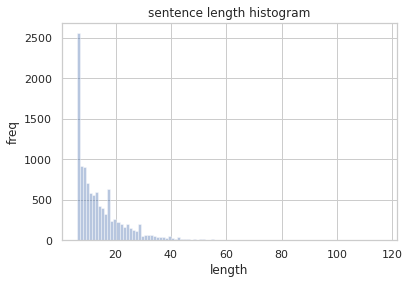

In [48]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('sentence length histogram')
ax.set_ylabel('freq')
sns.distplot(sentence_length, kde=False, rug=False, bins=100, axlabel="length")

In [49]:
length = []
sentence = []
pattern = re.compile('\W+')
for value in mail_df.values:
    uid = value[0]
    body = value[1]
    doc = nlp(body)
    for sent in doc.sents:
        if sent.text.isnumeric() or pattern.fullmatch(sent.text):
            pass
        else:
            length.append(len(sent.text.split()))
            sentence.append(sent.text)

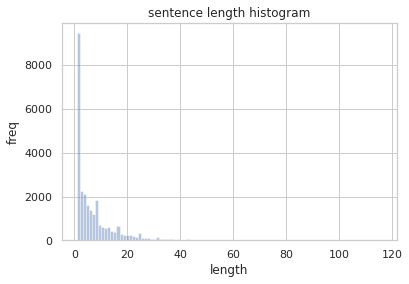

In [50]:
sentence_length = np.array(length)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('sentence length histogram')
ax.set_ylabel('freq')
sns.distplot(sentence_length, kde=False, rug=False, bins=100, axlabel="length")